## Compare SSE and perceptron classifier

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression

np.random.seed(42)

### Section1: Solve Regression Problem with linear regression cost function and see the results

#### Part1, Generating synthetic data:

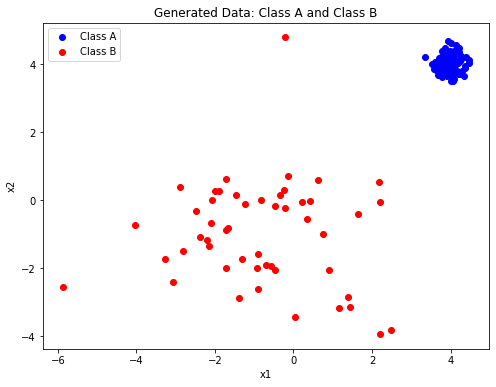

In [88]:
#in summary, this code generates a 2D array of 100 random points
#in 2D space, where each point is normally distributed around the
# mean (4, 4) with a standard deviation of 0.25.
class_A = np.random.normal(loc=(4,4), scale=0.25, size=(100,2))
#This code creates a 1D array of ones with the same number of
#elements as the number of rows in the class_A array.
label_A = np.ones(class_A.shape[0])

class_B = np.random.normal(loc=(-1, -1), scale=1.5, size=(50,2))
label_B = np.zeros(class_B.shape[0])

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

#### using SSE cost function from linear regression for an linear classification problem:

##### My Own Code:

In [89]:
X = np.vstack((class_A, class_B))
y = np.hstack((label_A, label_B))
print(X.shape)
print(y.shape)

def regression_closed_form(X, y):
    #Adding Bias:
    X_with_bias = np.c_[np.ones((len(X), 1)), X]
    #(x^T x)^-1 * y^T * X 
    w = np.dot(inv(np.dot(X_with_bias.transpose(), X_with_bias)), np.dot(y.T, X_with_bias ) ) 
    return w

def print_parameter_vectors(w):
    for i in range(len(w)):
        print(f"w{i} = {w[i]}")

def hypotheses_vector(w, X):
    h = w[0] + w[1] * X[: , 0] + w[2] * X[: , 1]
    return h

#Get parameter vector w
w = regression_closed_form(X, y)
print_parameter_vectors(w)

h = hypotheses_vector(w, X)
print(h.shape)


(150, 2)
(150,)
w0 = 0.22087902012005303
w1 = 0.08291195798146359
w2 = 0.10625584096398712
(150,)


##### Using SkLearn:

In [90]:
model = LinearRegression()
model.fit(X, y)

w1, w2 = model.coef_  # weights
w0 = model.intercept_  # bias

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f}")


Model weights: w1 = 0.08, w2 = 0.11, bias = 0.22


##### Plot the fitted line:

###### My Own Code:

(100,)


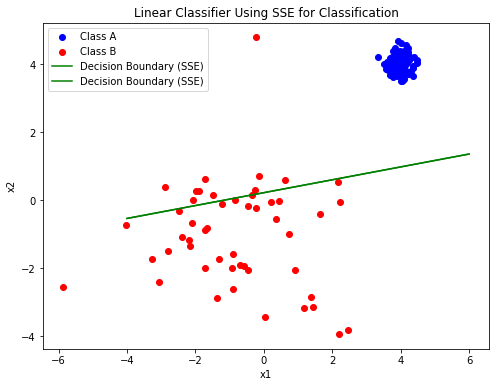

In [91]:
x_vals = np.linspace(-4, 6, 100)
x_vals_2d = np.column_stack((x_vals, x_vals))

print(x_vals.shape)
decision_boundary = hypotheses_vector(w, x_vals_2d)

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.plot(x_vals_2d, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

###### Masters Code:

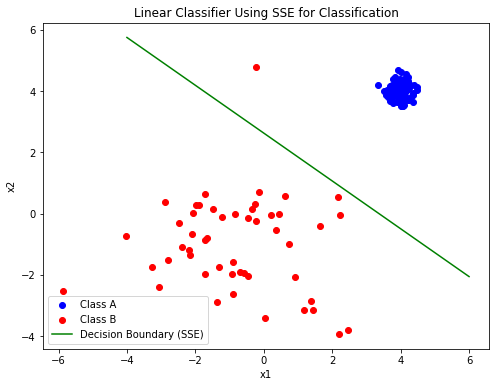

In [92]:
# Plot the decision boundary: w1 * x1 + w2 * x2 + b = 0.5
x_vals = np.linspace(-4, 6, 100)
decision_boundary = (-w1 * x_vals - w0 + 0.5) / w2

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.plot(x_vals, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


### Section3, Implementing a Perceptron Neural Network:



In [ ]:
from random import sample


class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs      = n_epochs
        self.weights       = None
        self.bias          = None
        self.errors_       = []
    
    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_samples]
            Target values. Must be +1 or -1.
        """
        n_sample, n_features = X.shape

        #Starting weights and bias with zero:
        self.weights = np.zero(n_features)
        self.bias   = 0.0

        for epoch in range(self.n_epochs):
            errors = 0 
            for i in range(n_sample):
                linear_output = np.dot(self.weights, X[i]) + self.bias # w^T x + b
                y_predicted   = self._unit_step(linear_output)
                #Misclassified:
                if y_predicted[i] != y[i]:
                    update        = self.learning_rate * y[i]
                    self.weights += update * y[i]
                    self.bias    += update
                    errors       += 1

            self.errors_.append(errors)

            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break





         

SyntaxError: expected ':' (Temp/ipykernel_10872/465624395.py, line 9)